# CFD FINAL PROJECT NOTEBOOK
### Plots and calculations
Calls from Blood_model_validation.py to validate and plot different aspects of the project. <br>
Plots and descriptions for final report.

In [2]:
### Import Statements
from Blood_model_validation import blood_model_validation, Q_
import numpy as np
import math
# from pint import UnitRegistry
# ureg = UnitRegistry()
# Q_ = ureg.Quantity
import pandas as pd
import matplotlib.pyplot as plt

### Instantiate Class
shear_range = np.arange(100,1000)
Parameters_BM_Class = {'Q_': Q_,
                           'strain': 450, # Pass universal strain for all models
                           'strain_range': shear_range,
                           'mu_0': 0.056,
                           'mu_inf': 0.0035}

bm = blood_model_validation(**Parameters_BM_Class)

The blood_model_validation class takes kwargs as input to better change parameters when evaluating viscosity over a range of shear stresses.

### Inlet Boundary Velocity

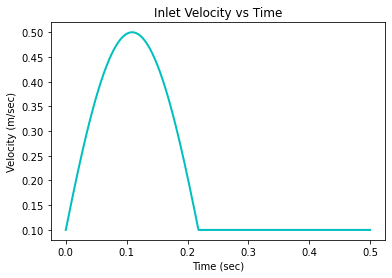

In [3]:
bm.inlet_profile()

### Plot Predicted Viscosity vs Shear Rate

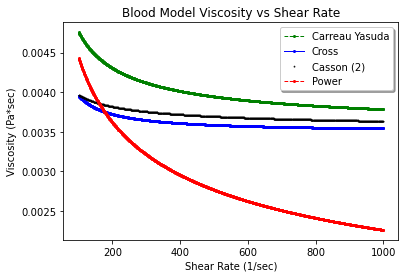

In [4]:
predicted_mu = bm.mu_calculations()

plt.figure()
plt.plot(predicted_mu['Strain (Pascal)'], predicted_mu['Carreau Yasuda'], 'go--', linewidth=1,markersize=2, label="Carreau Yasuda")
plt.plot(predicted_mu['Strain (Pascal)'], predicted_mu['Cross'], 'bo-', linewidth=1, markersize=2,label="Cross")
# ca1 = plt.plot(self.df['Strain (Pascal)'], self.df['Casson_1'], 'm--', linewidth=1, markersize=2,label="Casson (1)")
plt.plot(predicted_mu['Strain (Pascal)'], predicted_mu['Casson_2'], '^k', linewidth=1, markersize=1,label="Casson (2)")
plt.plot(predicted_mu['Strain (Pascal)'], predicted_mu['Power'], 'ro--', linewidth=1, markersize=2,label="Power")

plt.legend(loc="upper right", fontsize='medium', frameon=True, shadow=True)
plt.title('Blood Model Viscosity vs Shear Rate')
plt.ylabel('Viscosity (Pa*sec)')
plt.xlabel('Shear Rate (1/sec)')


plt.show()

Plot of shear dependant viscosity models from literature. <br>
Casson (1) was found to have incorrect parameters leading to running the casson simulation again with the Casson (2) formulation.

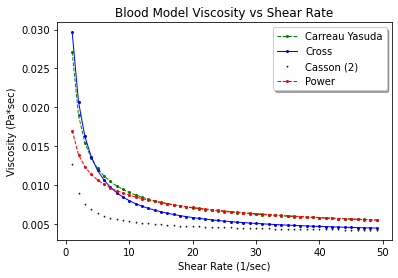

In [10]:
shear_range = np.arange(1,50)
Parameters_BM_Class = {'Q_': Q_,
                           'strain': 450, # Pass universal strain for all models
                           'strain_range': shear_range,
                           'mu_0': 0.056,
                           'mu_inf': 0.0035}

bm = blood_model_validation(**Parameters_BM_Class)
predicted_mu = bm.mu_calculations()

plt.figure()
plt.plot(predicted_mu['Strain (Pascal)'], predicted_mu['Carreau Yasuda'], 'go--', linewidth=1,markersize=2, label="Carreau Yasuda")
plt.plot(predicted_mu['Strain (Pascal)'], predicted_mu['Cross'], 'bo-', linewidth=1, markersize=2,label="Cross")
# ca1 = plt.plot(self.df['Strain (Pascal)'], self.df['Casson_1'], 'm--', linewidth=1, markersize=2,label="Casson (1)")
plt.plot(predicted_mu['Strain (Pascal)'], predicted_mu['Casson_2'], '^k', linewidth=1, markersize=1,label="Casson (2)")
plt.plot(predicted_mu['Strain (Pascal)'], predicted_mu['Power'], 'ro--', linewidth=1, markersize=2,label="Power")

plt.legend(loc="upper right", fontsize='medium', frameon=True, shadow=True)
plt.title('Blood Model Viscosity vs Shear Rate')
plt.ylabel('Viscosity (Pa*sec)')
plt.xlabel('Shear Rate (1/sec)')


plt.show()

### Avg Viscosity & Shear Rate wrt Time Over Entire Domain

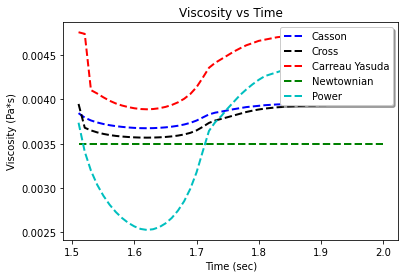

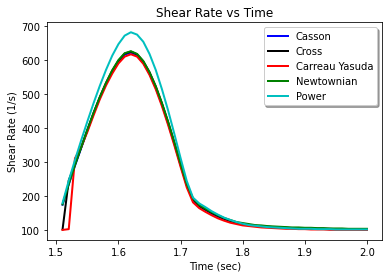

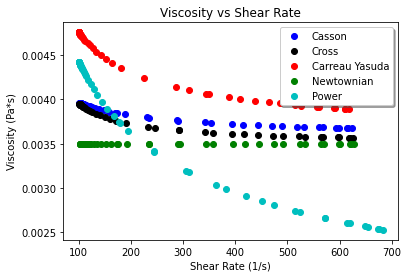

In [6]:
domain_sim_strain_df = pd.read_csv('https://raw.githubusercontent.com/jtarriela/EML_4930_Final/EML_4930/EML_4930/Data/Raw_Data_2/Domain_Average_Strain_Rate.csv')
domain_sim_strain_visc_df = bm.compute_sim_viscosity(domain_sim_strain_df)

plt.figure()
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['Casson Pa*sec'], 'b--', linewidth=2, label = "Casson")
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['Cross Pa*sec'], 'k--', linewidth=2, label = 'Cross')
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['CY Pa*sec'], 'r--', linewidth=2, label = 'Carreau Yasuda')
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['Newtownian Pa*sec'], 'g--', linewidth=2, label = 'Newtownian')
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['Power Pa*sec'], 'c--', linewidth=2, label='Power')
plt.legend(loc="upper right", fontsize='medium', frameon=True, shadow=True)
plt.title('Viscosity vs Time')
plt.xlabel('Time (sec)')
plt.ylabel('Viscosity (Pa*s)')
plt.show()

plt.figure()
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['Casson [ s^-1 ]'], 'b-', linewidth=2, label = "Casson")
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['Cross [ s^-1 ]'], 'k-', linewidth=2, label = 'Cross')
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['CY [ s^-1 ]'], 'r-', linewidth=2, label = 'Carreau Yasuda')
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['Newtownian [ s^-1 ]'], 'g-', linewidth=2, label = 'Newtownian')
plt.plot(domain_sim_strain_visc_df['Time [ s ]'], domain_sim_strain_visc_df['Power [ s^-1 ]'], 'c-', linewidth=2, label='Power')
plt.legend(loc="upper right", fontsize='medium', frameon=True, shadow=True)
plt.title('Shear Rate vs Time')
plt.xlabel('Time (sec)')
plt.ylabel('Shear Rate (1/s)')
plt.show()

plt.figure()
plt.plot(domain_sim_strain_visc_df['Casson [ s^-1 ]'], domain_sim_strain_visc_df['Casson Pa*sec'], 'bo', linewidth=2, label = "Casson")
plt.plot(domain_sim_strain_visc_df['Cross [ s^-1 ]'], domain_sim_strain_visc_df['Cross Pa*sec'], 'ko', linewidth=2, label = 'Cross')
plt.plot(domain_sim_strain_visc_df['CY [ s^-1 ]'], domain_sim_strain_visc_df['CY Pa*sec'], 'ro', linewidth=2, label = 'Carreau Yasuda')
plt.plot(domain_sim_strain_visc_df['Newtownian [ s^-1 ]'], domain_sim_strain_visc_df['Newtownian Pa*sec'], 'go', linewidth=2, label = 'Newtownian')
plt.plot(domain_sim_strain_visc_df['Power [ s^-1 ]'], domain_sim_strain_visc_df['Power Pa*sec'], 'co', linewidth=2, label='Power')
plt.legend(loc="upper right", fontsize='medium', frameon=True, shadow=True)
plt.title('Viscosity vs Shear Rate')
plt.xlabel('Shear Rate (1/s)')
plt.ylabel('Viscosity (Pa*s)')
plt.show()

### Avg Viscosity & Shear Rate wrt Time at Walls

In [7]:
# sim_wall_strain_df = pd.read_csv('https://raw.githubusercontent.com/jtarriela/FDA_Blood_Pump/EML_4930/EML_4930/Data/Shear_stress_df.csv')
# sim_wall_strain_visc_df = bm.compute_sim_viscosity(sim_wall_strain_df)

#bm.plot_viscosity_time()
#bm.plot_shear_time()
#bm.plot_viscosity_vs_shear()


### Wall Shear Stress Values

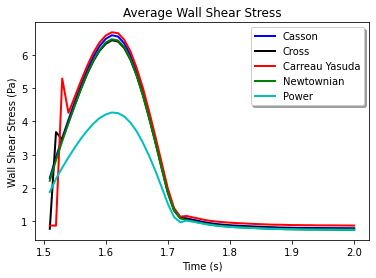

In [8]:
avg_wss_df =pd.read_csv('https://raw.githubusercontent.com/jtarriela/EML_4930_Final/EML_4930/EML_4930/Data/Raw_Data_2/Average_Wall_Shear_Stress_vs_Time.csv')
# bm.plot_wss(avg_wss_df)


plt.figure()
plt.plot(avg_wss_df['Time [ s ]'], avg_wss_df['Cassion [ Pa ]'], 'b-', linewidth=2, label = "Casson")
plt.plot(avg_wss_df['Time [ s ]'], avg_wss_df['Cross [ Pa ]'], 'k-', linewidth=2, label = 'Cross')
plt.plot(avg_wss_df['Time [ s ]'], avg_wss_df['CY [Pa]'], 'r-', linewidth=2, label = 'Carreau Yasuda')
plt.plot(avg_wss_df['Time [ s ]'], avg_wss_df['Newtownian [Pa]'], 'g-', linewidth=2, label = 'Newtownian')
plt.plot(avg_wss_df['Time [ s ]'], avg_wss_df['Power [Pa]'], 'c-', linewidth=2, label='Power')
plt.legend(loc="upper right", fontsize='medium', frameon=True, shadow=True)
plt.title('Average Wall Shear Stress')
plt.xlabel('Time (s)')
plt.ylabel('Wall Shear Stress (Pa)')
plt.show()

### Residual Analysis

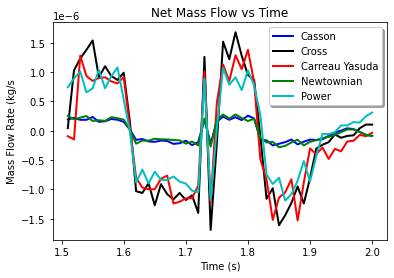

In [9]:
net_mass_flow_df = pd.read_csv('https://raw.githubusercontent.com/jtarriela/EML_4930_Final/EML_4930/EML_4930/Data/Raw_Data_2/Mass_Flow_Residuals.csv')
# bm.plot_mass_resid(net_mass_flow_df)
plt.figure()
plt.plot(net_mass_flow_df['Time [ s ]'], net_mass_flow_df['Casson [ kg s^-1 ]'], 'b-', linewidth=2, label = "Casson")
plt.plot(net_mass_flow_df['Time [ s ]'], net_mass_flow_df['Cross [ kg s^-1 ]'], 'k-', linewidth=2, label = 'Cross')
plt.plot(net_mass_flow_df['Time [ s ]'], net_mass_flow_df['CY [ kg s^-1 ]'], 'r-', linewidth=2, label = 'Carreau Yasuda')
plt.plot(net_mass_flow_df['Time [ s ]'], net_mass_flow_df['Newtownian [ kg s^-1 ]'], 'g-', linewidth=2, label = 'Newtownian')
plt.plot(net_mass_flow_df['Time [ s ]'], net_mass_flow_df['Power [ kg s^-1 ]'], 'c-', linewidth=2, label='Power')
plt.legend(loc="upper right", fontsize='medium', frameon=True, shadow=True)
plt.title('Net Mass Flow vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Mass Flow Rate (kg/s')
plt.show()

### Mesh Convergence

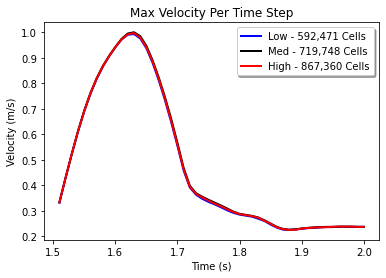

In [19]:
max_vel = pd.read_csv('https://raw.githubusercontent.com/jtarriela/EML_4930_Final/EML_4930/EML_4930/Data/Raw_Data_2/mesh_conv_max_vel.csv')

vel_col = max_vel.columns
plt.plot(max_vel[vel_col[0]], max_vel[vel_col[1]], 'b-', linewidth=2, label="Low - 592,471 Cells")
plt.plot(max_vel[vel_col[0]], max_vel[vel_col[2]], 'k-', linewidth=2, label='Med - 719,748 Cells')
plt.plot(max_vel[vel_col[0]], max_vel[vel_col[3]], 'r-', linewidth=2, label='High - 867,360 Cells')
plt.legend(loc="upper right", fontsize='medium', frameon=True, shadow=True)
plt.title('Max Velocity Per Time Step')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()
# print(vel_col)